# Render Episode
Render a stored episode.  Env file needs to have "episode" and "action" keys. 
- creates a moving gif file of the episode
- displays the episode in a widget with a slider for the time steps.

# Setup

In [1]:
#!apt -qq install graphviz libgraphviz-dev pkg-config
#!pip install -qq git+https://gitlab.aicrowd.com/flatland/flatland.git

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import PIL
from flatland.utils.rendertools import RenderTool
import imageio
import os

In [5]:
from IPython.display import clear_output
from IPython.core import display 
display.display(display.HTML("<style>.container { width:95% !important; }</style>"))

In [6]:
def render_env(env_renderer):
    ag0= env_renderer.env.agents[0]
    #print("render_env ag0: ",ag0.position, ag0.direction)
    aImage = env_renderer.render_env(show_rowcols=True, return_image=True)
    pil_image = PIL.Image.fromarray(aImage)
    return pil_image

# Experiments

This has been mostly changed to load envs using `importlib_resources`.  It's getting them from the package "envdata.tests`

In [7]:
import pickle

from flatland.envs.rail_env import RailEnv
from flatland.envs.rail_generators import sparse_rail_generator
from flatland.envs.line_generators import sparse_line_generator
from flatland.envs.malfunction_generators import malfunction_from_file, no_malfunction_generator
from flatland.envs.rail_generators import rail_from_file
from flatland.envs.rail_env import RailEnvActions
from flatland.envs.step_utils.states import TrainState

In [8]:
from flatland.envs.persistence import RailEnvPersister

In [9]:
env, env_dict = RailEnvPersister.load_new("complex_scene_2.pkl", load_from_package="env_data.railway")
_ = env.reset()
env._max_episode_steps = 100

pickle failed to load file: complex_scene_2.pkl  trying msgpack (deprecated)...
pickle failed to load file: complex_scene_2.pkl  trying msgpack (deprecated)...
pickle failed to load file: complex_scene_2.pkl  trying msgpack (deprecated)...
This env file has no max_episode_steps (deprecated) - setting to 100


100


C:\Users\u216993\.conda\envs\flatland3-rl\lib\site-packages\flatland\utils\rendertools.py:399: UserWarning: Predictor did not provide any predicted cells to render.                 Observation builder needs to populate: env.dev_obs_dict
  Observation builder needs to populate: env.dev_obs_dict")


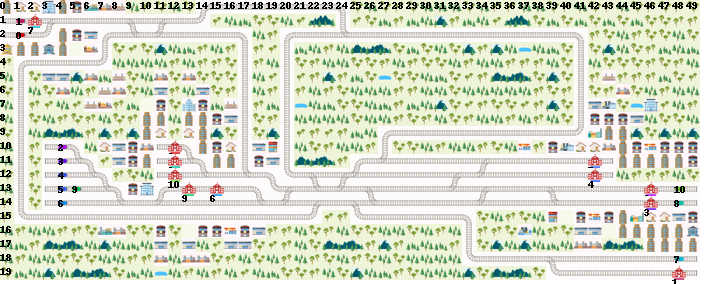

In [10]:
# the seed has to match that used to record the episode, in order for the malfunctions to match.
oRT = RenderTool(env, show_debug=True)
aImg = oRT.render_env(show_rowcols=True, return_image=True, show_inactive_agents=True)
print(env._max_episode_steps)
PIL.Image.fromarray(aImg)

In [11]:
loAgs = env_dict["agents"]
lCols =  "initial_direction,direction,initial_position,position".split(",")
pd.DataFrame([ [getattr(oAg, sCol) for sCol in lCols] 
              for oAg in loAgs], columns=lCols)

,initial_direction,direction,initial_position,position
0,1,1,"(2, 1)",None
1,1,1,"(1, 1)",None
2,1,1,"(10, 4)",None
3,1,1,"(11, 4)",None
4,1,1,"(12, 4)",None
5,1,1,"(13, 4)",None
6,1,1,"(14, 4)",None
7,3,3,"(18, 48)",None
8,3,3,"(14, 48)",None
9,1,1,"(13, 5)",None


In [12]:
pd.DataFrame([ [getattr(oAg, sCol) for sCol in lCols] 
              for oAg in env.agents], columns=lCols)

,initial_direction,direction,initial_position,position
0,1,1,"(2, 1)",None
1,1,1,"(1, 1)",None
2,1,1,"(10, 4)",None
3,1,1,"(11, 4)",None
4,1,1,"(12, 4)",None
5,1,1,"(13, 4)",None
6,1,1,"(14, 4)",None
7,3,3,"(18, 48)",None
8,3,3,"(14, 48)",None
9,1,1,"(13, 5)",None


In [13]:
pd.DataFrame([ vars(oAg) for oAg in env.agents])

,initial_position,initial_direction,direction,target,moving,earliest_departure,latest_arrival,handle,speed_counter,action_saver,state_machine,malfunction_handler,position,arrival_time,old_direction,old_position
0,"(2, 1)",1,1,"(10, 12)",False,64,191,0,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
1,"(1, 1)",1,1,"(19, 48)",False,10,210,1,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
2,"(10, 4)",1,1,"(13, 46)",False,121,196,2,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
3,"(11, 4)",1,1,"(14, 46)",False,121,193,3,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
4,"(12, 4)",1,1,"(12, 42)",False,10,78,4,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
5,"(13, 4)",1,1,"(11, 42)",False,99,167,5,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
6,"(14, 4)",1,1,"(13, 15)",False,31,60,6,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
7,"(18, 48)",3,3,"(1, 2)",False,2,199,7,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
8,"(14, 48)",3,3,"(11, 12)",False,83,147,8,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
9,"(13, 5)",1,1,"(13, 13)",False,28,55,9,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None


In [14]:
# from persistence.py
def get_agent_state(env):
    list_agents_state = []
    for iAg, oAg in enumerate(env.agents):
        # the int cast is to avoid numpy types which may cause problems with msgpack
        # in env v2, agents may have position None, before starting
        if oAg.position is None:
            pos = (0, 0)
        else:
            pos = (int(oAg.position[0]), int(oAg.position[1]))
        # print("pos:", pos, type(pos[0]))
        list_agents_state.append(
            [*pos, int(oAg.direction), oAg.malfunction_handler])
      
    return list_agents_state

In [15]:
pd.DataFrame([ vars(oAg) for oAg in env.agents])

,initial_position,initial_direction,direction,target,moving,earliest_departure,latest_arrival,handle,speed_counter,action_saver,state_machine,malfunction_handler,position,arrival_time,old_direction,old_position
0,"(2, 1)",1,1,"(10, 12)",False,64,191,0,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
1,"(1, 1)",1,1,"(19, 48)",False,10,210,1,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
2,"(10, 4)",1,1,"(13, 46)",False,121,196,2,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
3,"(11, 4)",1,1,"(14, 46)",False,121,193,3,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
4,"(12, 4)",1,1,"(12, 42)",False,10,78,4,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
5,"(13, 4)",1,1,"(11, 42)",False,99,167,5,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
6,"(14, 4)",1,1,"(13, 15)",False,31,60,6,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
7,"(18, 48)",3,3,"(1, 2)",False,2,199,7,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
8,"(14, 48)",3,3,"(11, 12)",False,83,147,8,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None
9,"(13, 5)",1,1,"(13, 13)",False,28,55,9,speed: 1.0 max_count: 0 ...,"is_action_saved: False, saved_action: None",\n state: TrainState.WAITING ...,malfunction_down_counter: 0 in...,None,None,None,None


In [16]:
expert_actions = []
action = {}

In [18]:
env_renderer = RenderTool(env, gl="PGL", show_debug=True)

n_agents = env.get_num_agents()
x_dim, y_dim = env.width, env.height
max_steps = env._max_episode_steps

action_dict = {}
frames = []

# log everything in original state
statuses = []
for a in range(n_agents):
    statuses.append(env.agents[a].state)
pilImg = render_env(env_renderer)
frames.append({
    'image': pilImg,
    'statuses': statuses
    })

step = 0
all_done = False
failed_action_check = False
print("Processing episode steps:")
while not all_done:
    print(step, end=", ")
     
    for agent_handle, agent in enumerate(env.agents):
        action_dict.update({agent_handle: RailEnvActions.MOVE_FORWARD})
     
    next_obs, all_rewards, done, info = env.step(action_dict)
  
    statuses = []
    for a in range(n_agents):
        statuses.append(env.agents[a].state)

    #clear_output(wait=True)
    pilImg = render_env(env_renderer)
    frames.append({
        'image': pilImg,
        'statuses': statuses
      })
    #print("Replaying {}/{}".format(step, max_steps))

    if done['__all__']:
        all_done = True
        max_steps = step + 1
        print("done")

    step += 1

C:\Users\u216993\.conda\envs\flatland3-rl\lib\site-packages\flatland\utils\rendertools.py:399: UserWarning: Predictor did not provide any predicted cells to render.                 Observation builder needs to populate: env.dev_obs_dict
  Observation builder needs to populate: env.dev_obs_dict")


Processing episode steps:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, done


In [19]:
assert failed_action_check == False, "Realised states did not match stored states."

In [25]:
from ipywidgets import interact, interactive, fixed, interact_manual, Play
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from IPython.display import HTML

display.display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))

def plot_func(frame_idx):
    frame = frames[int(frame_idx)]
    display.display(frame['image'])
    #print(frame['statuses'])

if True:
    slider = widgets.FloatSlider(value=0, min=0, max=max_steps, step=1)
    interact(plot_func, frame_idx = slider)

    play = Play(
        max=max_steps,
        value=0,
        step=1,
        interval=250
    )

    widgets.link((play, 'value'), (slider, 'value'))
    widgets.VBox([play])

interactive(children=(FloatSlider(value=0.0, description='frame_idx', step=1.0), Output()), _dom_classes=('wid…